<a href="https://colab.research.google.com/github/adijoy10/my_projects/blob/main/BHP_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")

In [ ]:
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
42,Super built-up Area,Ready To Move,Ganga Nagar,1 BHK,Ceove G,600,1.0,0.0,38.0
8033,Super built-up Area,Ready To Move,Thigalarapalya,3 BHK,Prtanha,2072,4.0,2.0,160.0
5635,Plot Area,Ready To Move,Prakruthi Township,6 Bedroom,NaN,800,8.0,NaN,150.0
9782,Built-up Area,Ready To Move,2nd Phase JP Nagar,2 BHK,NaN,1040,2.0,2.0,78.0
13113,Super built-up Area,Ready To Move,Somasundara Palya,3 BHK,NaN,1571,3.0,3.0,63.0
8874,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,NaN,1110,2.0,1.0,52.0
7837,Plot Area,Ready To Move,Hebbal,4 Bedroom,NaN,1200,4.0,2.0,225.0
10464,Super built-up Area,Ready To Move,Harlur,3 BHK,Prncyrn,1755,3.0,2.0,115.0
10814,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1205,2.0,1.0,85.0
10800,Built-up Area,20-Dec,Whitefield,3 BHK,NaN,1820,3.0,2.0,113.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df[df['total_sqft']==0]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df2=df.drop(['area_type','society','availability'],axis='columns')

In [ ]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df3=df2.dropna()

In [ ]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [ ]:
df3.shape

(12710, 6)

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-14-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df3.sample(10)

,location,size,total_sqft,bath,balcony,price,bhk
10410,Yeshwanthpur,5 Bedroom,1700,5.0,2.0,300.0,5
6324,Thubarahalli,2 BHK,1200,2.0,2.0,79.0,2
324,Rajaji Nagar,3 BHK,2390,3.0,2.0,415.0,3
4464,Somasundara Palya,2 BHK,1185,2.0,3.0,70.0,2
10728,Chandra Layout,3 BHK,1600,3.0,2.0,130.0,3
11733,Prithvi Layout,4 BHK,4040,4.0,0.0,500.0,4
1868,Lingarajapuram,2 Bedroom,1350,2.0,1.0,80.0,2
2140,Harlur,3 BHK,1754,3.0,2.0,125.0,3
10947,Malleshwaram,3 BHK,2200,3.0,2.0,275.0,3
5833,Hennagara,6 BHK,1200,6.0,3.0,120.0,6


In [ ]:
df3=df3.drop(['size'],axis=1)

In [ ]:
df3.head(5)


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
      return False
  return True

In [ ]:
is_float(1133 - 1384)

True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)] #items which are not float are returned

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [ ]:
def convert_num( x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        x = float(x)
    except ValueError:
        return None
    return x

In [ ]:
convert_num('850 ')

850.0

In [ ]:
df3['total_sqft'] = df3['total_sqft'].astype(str)

In [ ]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_num)

In [ ]:
df4.head(4)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3


In [ ]:
df4.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [ ]:
df5=df4.copy()
df5['price_per_sqft']=(df4['price']*100000)/df4['total_sqft']


In [ ]:
df5.head(5)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
len(df5.location.unique())

1265

In [ ]:
df5.location=df5.location.apply(lambda x:x.strip())

In [ ]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [ ]:
len(location_stats[location_stats<=10])

1017

In [ ]:
location_under_10=location_stats[location_stats<=10]

In [ ]:
location_under_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [ ]:
len(df5.location.unique())

1254

In [ ]:
df5.location=df5.location.apply(lambda x:'other' if x in location_under_10 else x)

In [ ]:
len(df5.location.unique())

238

In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [ ]:
df6=df5[~(df5.total_sqft/df5.bhk<=300)]
df6.sample(4)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
467,Ambalipura,1800.0,3.0,3.0,110.0,3,6111.111111
2205,Thanisandra,1847.0,3.0,2.0,123.0,3,6659.447753
3751,Old Madras Road,2760.0,5.0,2.0,157.0,3,5688.405797
5781,other,2050.0,3.0,1.0,100.0,4,4878.048780


In [ ]:
df6.shape

(11889, 7)

In [ ]:
df6.price_per_sqft.describe()

count     11847.000000
mean       6122.582987
std        3895.257533
min         267.829813
25%        4187.716982
50%        5227.272727
75%        6750.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#now we will remove outliers.by comparing the price that if a 2bh apartment has more price than  a 3bhk one in the same area


<Axes: >

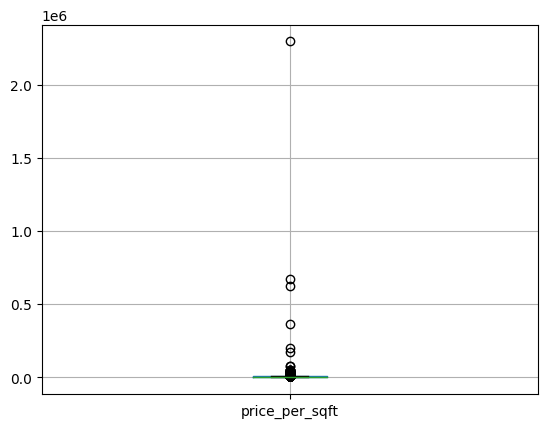

In [ ]:
df5.boxplot(column='price_per_sqft')

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9674, 7)

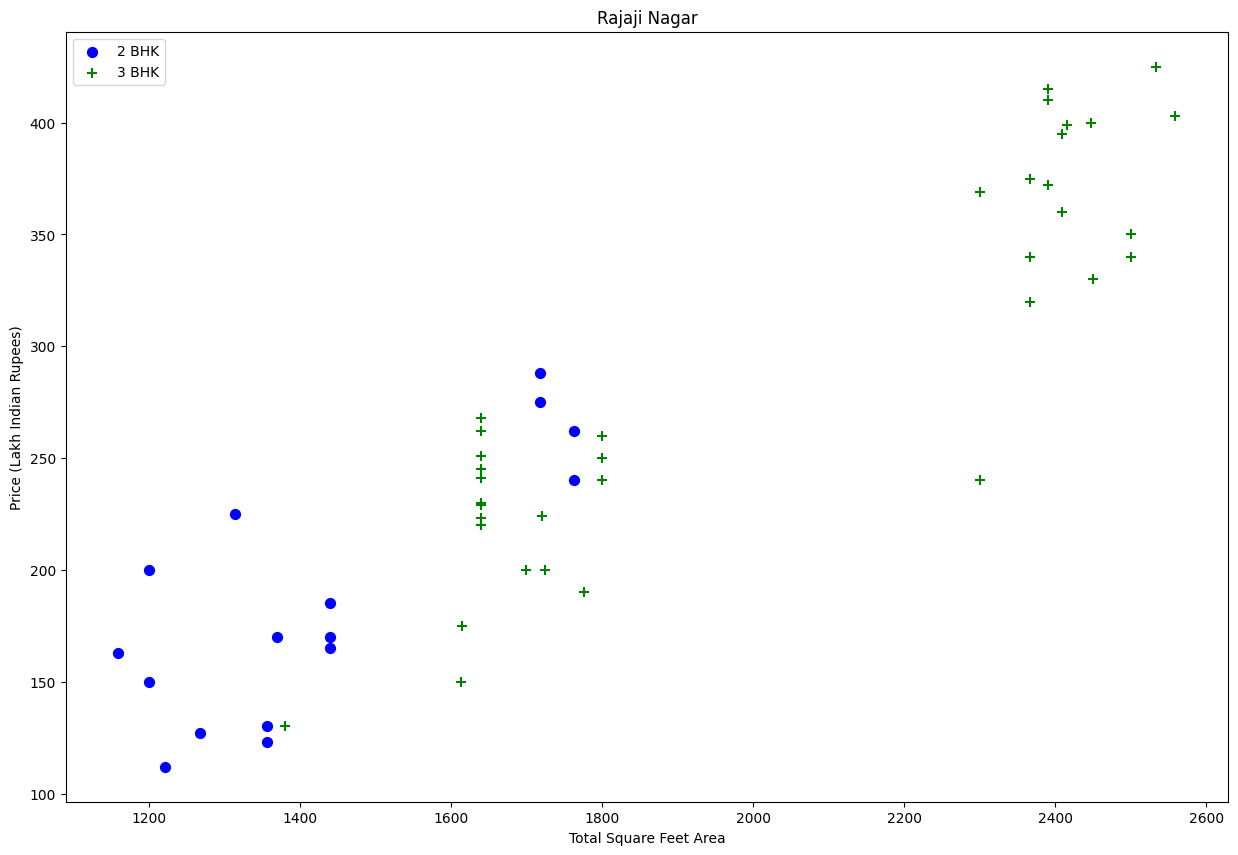

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(6905, 7)

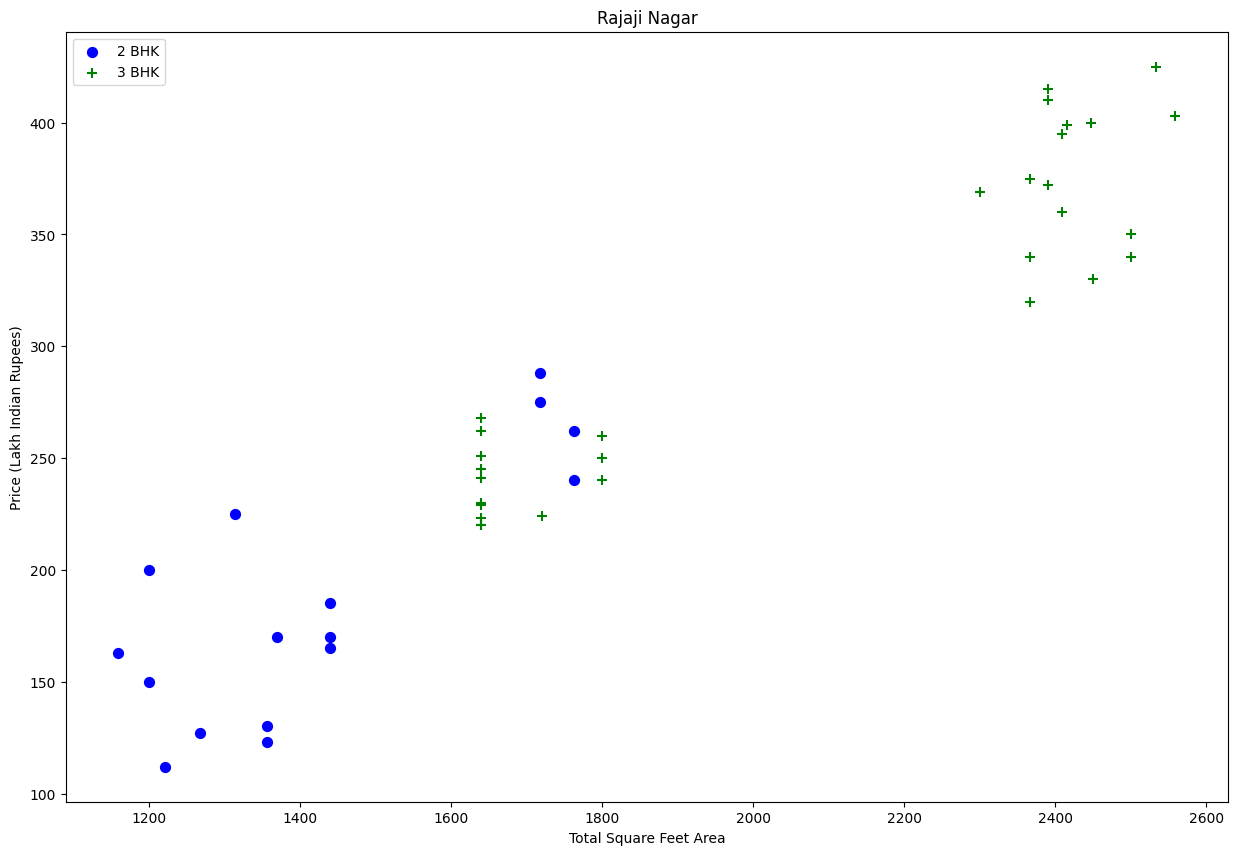

In [ ]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [ ]:
df8[df8.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9113,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [ ]:
df8[df8.bath>df8.bhk+2]


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1499,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6344,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
7961,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [ ]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(6841, 7)

In [ ]:
df10 = df9.drop(['bath','price_per_sqft','balcony'],axis='columns')
df10.sample(5)


,location,total_sqft,price,bhk
3666,Kalena Agrahara,800.0,30.0,2
5294,Raja Rajeshwari Nagar,1162.0,65.0,2
1085,Bharathi Nagar,1432.0,68.0,2
7535,other,1200.0,65.0,2
1488,Chikka Tirupathi,2600.0,120.0,4


In [ ]:
dummies=pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df11 = pd.concat([df10.drop('location',axis='columns'),dummies.drop('other',axis='columns')],axis='columns')
df11.sample(5)

,total_sqft,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2569,1756.0,131.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6328,1573.0,90.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,2180.0,180.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4239,952.0,49.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9660,1650.0,130.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df11['price']
x=df11.drop('price',axis='columns')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
model_1=LinearRegression()

In [ ]:
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
model_1.score(X_train,y_train)

0.860381805201313

In [ ]:
model_1.score(X_test,y_test)

0.8126613412142981

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87273738, 0.83764743, 0.800617  , 0.86539695, 0.86538665])

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.848357,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.717956,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.702116,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


from matplotlib import pyplot as plt
_df_0['best_score'].plot(kind='hist', bins=20, title='best_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['best_score'].plot(kind='line', figsize=(8, 4), title='best_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='best_score', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    x1 = np.zeros(len(x.columns))
    x1[0] = sqft
    x1[1] = bath
    x1[2] = bhk
    if loc_index >= 0:
        x1[loc_index] = 1

    return model_1.predict([x1])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


320.8729545759788

In [ ]:
predict_price('1st Phase JP Nagar',1000, 1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


203.16389930022288

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


390.41332822509355

In [ ]:
x.columns

Index(['total_sqft', 'bhk', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=239)

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model_1,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))